# Import needed modules

In [3]:
!pip install tensorflow==2.9.1

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tensorflow==2.9.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)
ERROR: No matching distribution found for tensorflow==2.9.1


In [14]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Define the directory containing your test dataset
test_dir = '/content/drive/My Drive/colon_image_Test_sets'

# Create a list of file paths and corresponding labels
filepaths = []
labels = []

for folder_name in os.listdir(test_dir):
    folder_path = os.path.join(test_dir, folder_name)
    for filename in os.listdir(folder_path):
        filepaths.append(os.path.join(folder_path, filename))
        labels.append(folder_name)

# Create a dataframe to use with ImageDataGenerator
test_df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# Create an ImageDataGenerator for the test dataset
batch_size = 16
img_size = (224, 224)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load your trained model
model_path = 'Colon Cancer.h5'
model = tf.keras.models.load_model(model_path)

# Use the model to generate predictions on your test data
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Calculate metrics
cm = confusion_matrix(true_labels, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(true_labels, y_pred, target_names=test_generator.class_indices)
print("Classification Report:")
print(report)


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/colon_image_Test_sets'

In [15]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# **Data Preprocessing**

### **Read data and store it in dataframe**

In [16]:
# Generate data paths with labels
data_dir = 'G:\colon_image_sets'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [17]:
df

filepaths     labels
0     G:\colon_image_sets\colon_aca\colonca1001.jpeg  colon_aca
1     G:\colon_image_sets\colon_aca\colonca1002.jpeg  colon_aca
2     G:\colon_image_sets\colon_aca\colonca1004.jpeg  colon_aca
3     G:\colon_image_sets\colon_aca\colonca1006.jpeg  colon_aca
4     G:\colon_image_sets\colon_aca\colonca1008.jpeg  colon_aca
...                                              ...        ...
2180      G:\colon_image_sets\colon_n\colonn986.jpeg    colon_n
2181      G:\colon_image_sets\colon_n\colonn989.jpeg    colon_n
2182       G:\colon_image_sets\colon_n\colonn99.jpeg    colon_n
2183      G:\colon_image_sets\colon_n\colonn993.jpeg    colon_n
2184      G:\colon_image_sets\colon_n\colonn999.jpeg    colon_n

[2185 rows x 2 columns]

### **Split dataframe into train, valid, and test**

In [18]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

### **Create image data generator**

In [19]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 1748 validated image filenames belonging to 2 classes.
Found 262 validated image filenames belonging to 2 classes.
Found 175 validated image filenames belonging to 2 classes.


### **Show sample from train data**

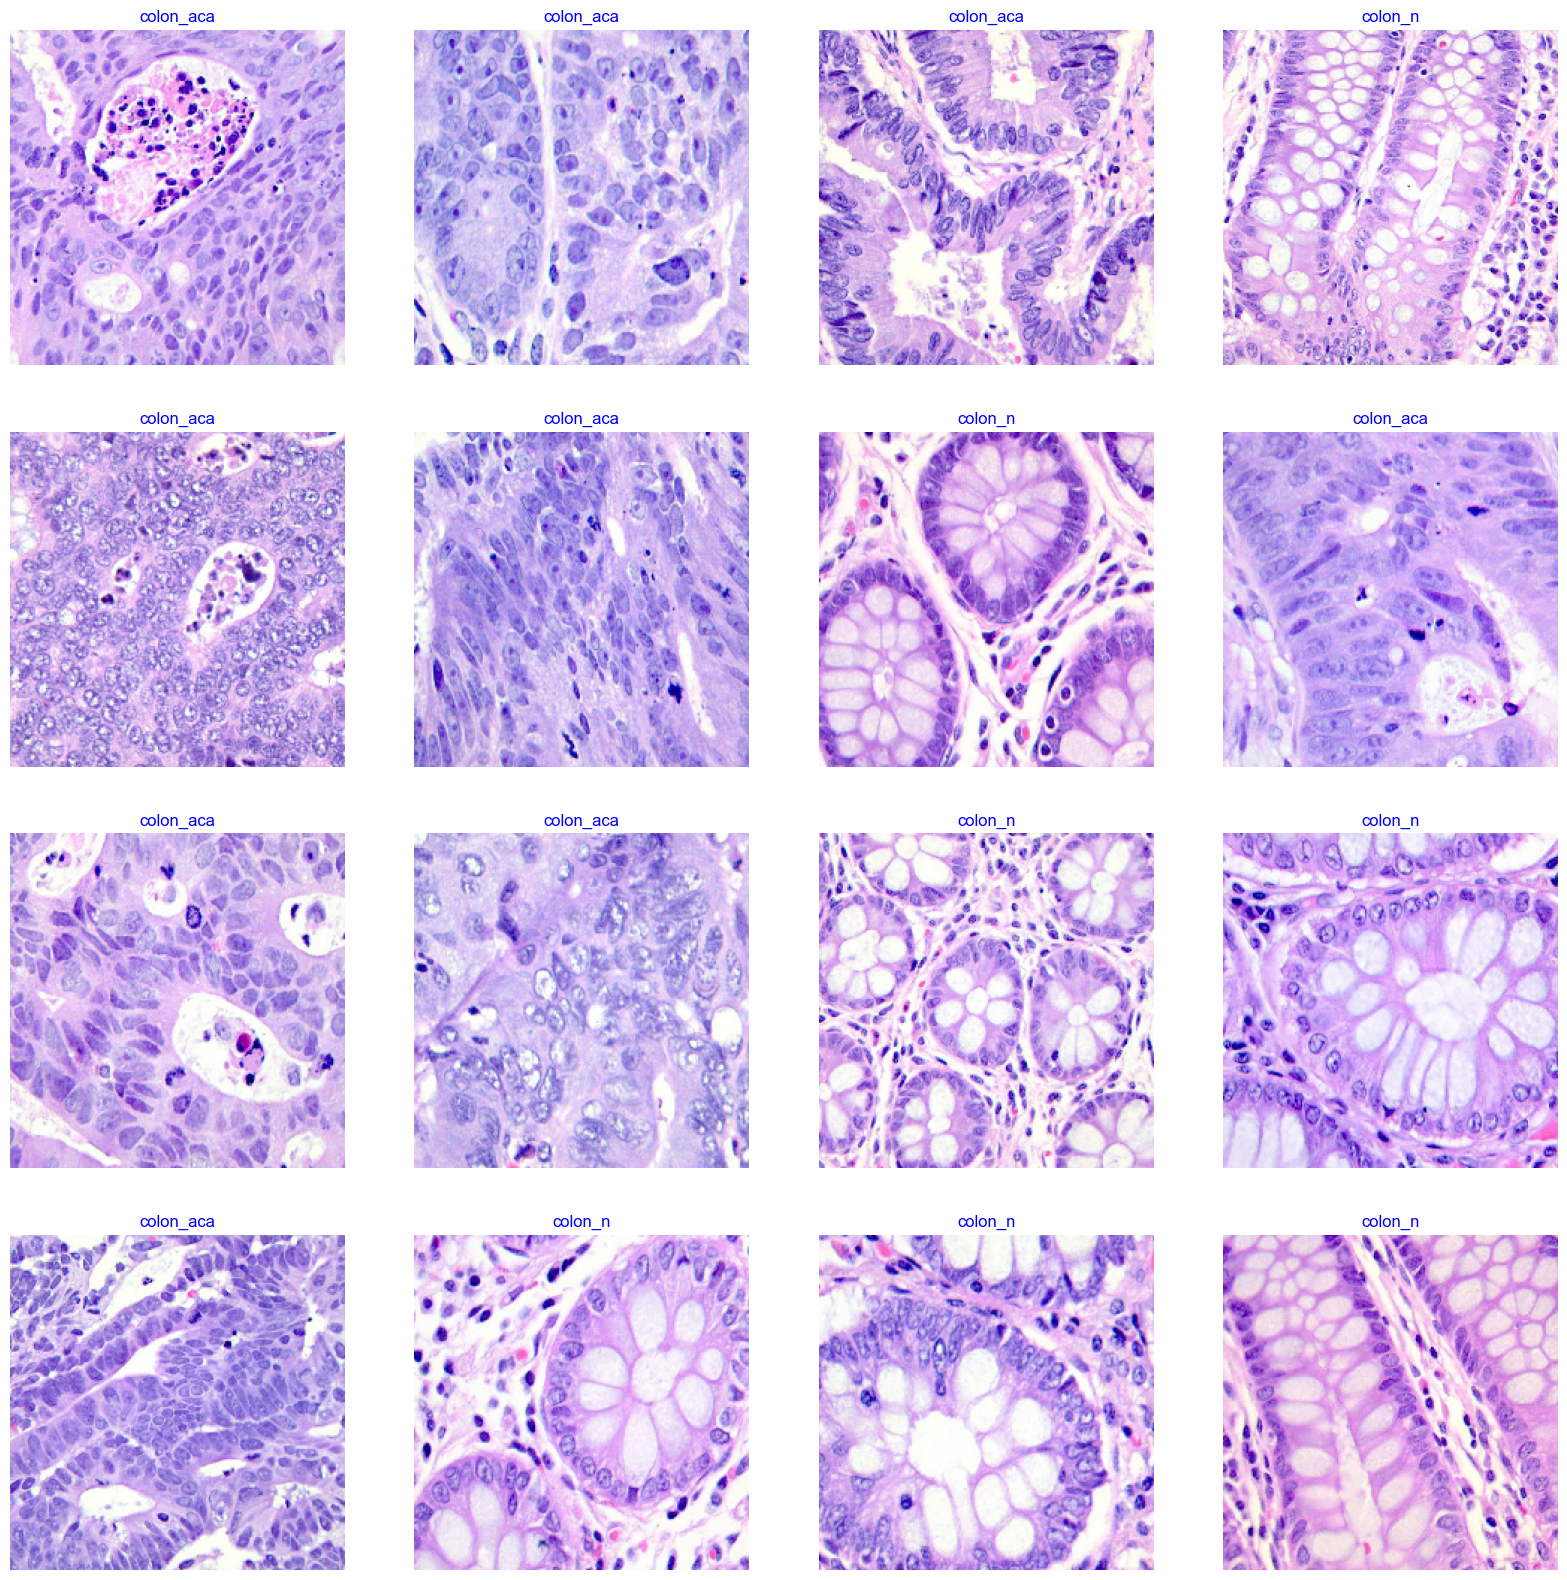

In [20]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# **Model Structure**

#### **Generic Model Creation**

In [21]:
from pyswarms.single import GlobalBestPSO

# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# Define PSO optimizer function
def pso_optimizer(params, train_gen, valid_gen):
    # Define your model architecture here
    base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
    model = Sequential([
        base_model,
        BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
        Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
              bias_regularizer=regularizers.l1(0.006), activation='relu'),
        Dropout(rate=0.45, seed=123),
        Dense(class_count, activation='softmax')
    ])
    
    # Set parameters for the optimizer
    learning_rate = params[0]
    
    # Compile the model with PSO optimizer
    optimizer = tf.keras.optimizers.Adamax(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(train_gen, epochs=epochs, validation_data=valid_gen)
    
    # Return the validation accuracy as the value to be minimized by PSO
    val_acc = history.history['val_accuracy'][-1]
    return -val_acc

# Set PSO parameters
lb = [0.0001]  # lower bounds for parameters
ub = [0.1]  # upper bounds for parameters

# Run PSO optimization
best_params, _ = pso(pso_optimizer, lb, ub, args=(train_gen, valid_gen))

# Retrieve best learning rate from PSO optimization
best_learning_rate = best_params[0]

# Compile the model with the best learning rate
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(l=0.016), activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

optimizer = tf.keras.optimizers.Adamax(learning_rate=best_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the full dataset
history = model.fit(train_gen, epochs=epochs, validation_data=valid_gen)


ModuleNotFoundError: No module named 'pyswarms'

#### **Train model**

#### **Display model performance**

In [22]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

NameError: name 'history' is not defined

# **Evaluate model**

In [23]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

NameError: name 'model' is not defined

# **Get Predictions**

In [24]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

NameError: name 'model' is not defined

#### **Confusion Matrics and Classification Report**

In [25]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

NameError: name 'y_pred' is not defined

In [26]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

NameError: name 'y_pred' is not defined

#### **Save model**

In [27]:
#Save the model
model.save('E:\lung_colon_image_set\Colon Cancer.h5')

NameError: name 'model' is not defined

## **Prediction using loaded_model**

In [28]:
loaded_model = tf.keras.models.load_model('Colon Cancer.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

ValueError: Unknown layer: 'TFOpLambda'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [29]:
image_path = "E:\lung_colon_image_set\colon_image_sets\colon_n\colonn37.jpeg"
image = Image.open(image_path)
# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Cancerous', 'Non_Cancerous']
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

NameError: name 'loaded_model' is not defined

## Convert to tflite

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert() 

print("model converted")

# Save the model. 
with open('Colon.tflite', 'wb') as f:
    f.write(tflite_model)

NameError: name 'model' is not defined

In [4]:
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adamax

# Load the pre-trained model for Streamlit prediction
loaded_model = tf.keras.models.load_model('Colon Cancer.h5', compile=False)
loaded_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define classes for the prediction
class_labels = ['Cancerous', 'Non_Cancerous']

# Function to preprocess the image
def preprocess_image_streamlit(image):
    img = image.resize((224, 224))  # Resize the image to match the input size of the model
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    return img_array

# Function to make prediction
def predict_streamlit(image_array):
    predictions = loaded_model.predict(image_array)
    score = tf.nn.softmax(predictions[0])
    return class_labels[tf.argmax(score)]

# Streamlit app
st.title('Colon Cancer Prediction')

# Upload image
uploaded_image = st.file_uploader("Choose an image...", type=['jpg', 'jpeg', 'png'])

if uploaded_image is not None:
    # Display the uploaded image
    image = Image.open(uploaded_image)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Make prediction when predict button is clicked
    if st.button('Predict'):
        img_array = preprocess_image_streamlit(image)
        prediction = predict_streamlit(img_array)
        st.success(f'The image is predicted as: {prediction}')


ValueError: Unknown layer: 'TFOpLambda'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
streamlit run C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py
    

In [ ]:
!pip install --upgrade protobuf

